# Symbol names and pretty printing

While preparing a solution to a homework problem, I came across (and made use of) what seems to be an undocumented feature of `sympy`'s $\LaTeX$ printer to produce symbols with internal typesetting instructions. Here's what I figured out based on reading the source.

The $\LaTeX$ printer figures out how to typeset a particular `sympy` symbol from its name. At the most basic level, the name of the symbol is simply what is printed. This is also the behavior if pretty-printing is turned off. If pretty-printing is turned on, however, the symbol names are typeset in an italic font.

In [1]:
import sympy as sp
sp.init_printing()

sp.symbols('x long')

Certain symbol names are special. If you name a symbol after a Greek letter, for example, it gets typeset as that letter, rather than the name of the letter:

In [2]:
# just a couple of examples
sp.symbols('Delta theta')

A few Greek letters have variant symbols in $\LaTeX$, which are also supported.

In [3]:
# the full set
sp.symbols('phi varphi epsilon varepsilon kappa varkappa ' +
           'pi varpi rho varrho sigma varsigma theta vartheta')

There are a limited number of "other symbols", most of which appear as variables in mathematical expressions from time to time.

In [4]:
# the full set
sp.symbols('aleph beth daleth gimel ell eth hbar hslash mho wp')

The '_' and '^' keys can be used to make subscripts and superscripts, respectively.

In [5]:
# just a few examples...
sp.symbols('Gamma_jk^i aleph_0 Delta^n+1')

Two notes here: first, `sympy` symbol names can contain characters (the '+' and '^' above) which are not valid in python variable names. Second, the parsing rules for superscripts and subscripts are different than in $\LaTeX$, which would render Delta^n+1 as $$\Delta^n+1$$

Here's where it really starts to get interesting. The $\LaTeX$ printer also will interpret some strings at the end of a variable name as accents:

In [6]:
# all of the supported accents
sp.symbols('x xdot xddot xdddot xddddot xvec xbar xtilde' +
           ' xcheck xbreve xhat xacute xgrave xprime xprm xmathring')

a few others as type faces:

In [7]:
# the cal typeface only has capital letters
sp.symbols('X Xbold Xbm Xcal Xscr Xfrak')

(X, Xbold, Xbm, Xcal, Xscr, Xfrak)

and a few others as brackets:

In [8]:
sp.symbols('phi phinorm phiavg phiabs phimag')

These modifiers can be chained, though not all combinations will produce visually distinct output.

In [9]:
sp.symbols('Scalboldprimevec')

Also, order matters. The parser works from the end of the name backward, so whatever goes last will be applied to the most of the expression.

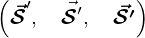

In [10]:
sp.symbols('Scalvecboldprime Scalboldprimevec Scalprimevecbold')

And, speaking of working backward, I can now tie this back to the beginning of this post: working on Electricity and Magnetism problems. It is often the case that one needs to keep track of a source point (usually called $\mathbf{r}'$), a field point (usually called $\mathbf{r}$) and a *separation vector*, which is the difference between the two. Griffiths uses a cursive 'r' for this last vector, but the symbol he uses does not appear in any of the $\LaTeX$ symbol tables. On [his website](https://www.reed.edu/physics/faculty/griffiths.html), he provides some image files which can be used to produce the symbol, but that won't work for seamlessly in `sympy`. Careful choice of symbol names does give us some options, however.

Standard practice is to use the same letter for a vector and its length, but have the vector typeset in upright bold and the length in normal weight italics. That convention bends a little bit in `sympy` symbol names, because $\boldsymbol{r}$ and $\mathbf{r}$ are different, and the former is what you get when you call a symbol `rbold` or `rbm`. You can't get $\mathbf{r}$ without some additional customization.

In [11]:
sp.symbols('rscr rscrbold rfrak rfrakbold rfrakabs rvec rbm rprime rbmprime')

(rscr, rscrbold, rfrak, rfrakbold, |rfrak|, r⃗, rbm, r′, rbm′)

In the problem I was working, I chose to use $\mathfrak{r}$ for the separation vector and $|\mathfrak{r}|$ for its length, but looking at all of my options now, I probably should have chosen $\mathscr{r}$ for the length and $\boldsymbol{\mathscr{r}}$ (or maybe even $\vec{\mathscr{r}}$) for the vector.